In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
base = pd.read_csv('base_tratada.csv', header=0, sep=',')

In [4]:
base.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,atraso_medio,media_faturas,media_pagamento,default
0,20000,2,2,1,24,-0.333333,1284.000000,114.833333,1
1,120000,2,2,2,26,0.500000,2846.166667,833.333333,1
2,90000,2,2,2,34,0.000000,16942.166667,1836.333333,0
3,50000,2,2,1,37,0.000000,38555.666667,1398.000000,0
4,50000,1,2,1,57,-0.333333,18223.166667,9841.500000,0


In [5]:
# separando as variaveis
X = base.drop('default', axis=1)
y = base['default']

In [6]:
# dividir a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Regressão Logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
# XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [11]:
# fazer o predict dos modelos
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [12]:
# comparando real x predito
comparacao = pd.DataFrame({'Real': y_test, 'Logistic_Pred': y_pred_logistic, 'RF_Pred': y_pred_rf, 'XGB_Pred': y_pred_xgb})

In [13]:
print(comparacao.head())

       Real  Logistic_Pred  RF_Pred  XGB_Pred
2308      0              0        1         0
22404     0              0        0         0
23397     0              0        0         0
25058     0              0        0         0
2664      1              0        1         0


In [14]:
# fazer acurácia
from sklearn.metrics import accuracy_score
acc_logistic = accuracy_score(y_test, y_pred_logistic)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Acurácia Regressão Logística: {acc_logistic:.4f}')
print(f'Acurácia Random Forest: {acc_rf:.4f}')
print(f'Acurácia XGBoost: {acc_xgb:.4f}')

Acurácia Regressão Logística: 0.7952
Acurácia Random Forest: 0.8002
Acurácia XGBoost: 0.8002


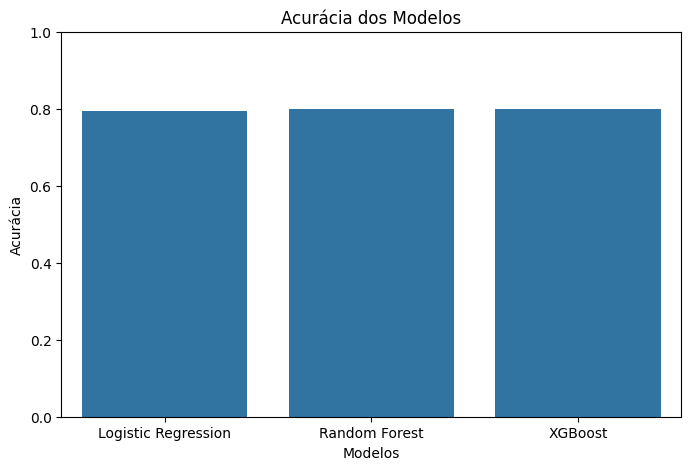

In [15]:
import matplotlib.pyplot as plt

modelos = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracias = [acc_logistic, acc_rf, acc_xgb]

plt.figure(figsize=(8, 5))
sns.barplot(x=modelos, y=accuracias)
plt.ylim(0, 1)
plt.title('Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.xlabel('Modelos')
plt.show()